# NESAC code

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import h5py 
import os #For interacting with OS
import cartopy.crs as ccrs

In [2]:
#Reading and listing keys present in HDF

fn = '3DIMG_30MAR2018_0000_L1B_STD.h5' #filename (the ".h5" file)
f = h5py.File(fn)
list(f.keys())

['GeoX',
 'GeoX1',
 'GeoX2',
 'GeoY',
 'GeoY1',
 'GeoY2',
 'GreyCount',
 'IMG_MIR',
 'IMG_MIR_RADIANCE',
 'IMG_MIR_TEMP',
 'IMG_SWIR',
 'IMG_SWIR_RADIANCE',
 'IMG_TIR1',
 'IMG_TIR1_RADIANCE',
 'IMG_TIR1_TEMP',
 'IMG_TIR2',
 'IMG_TIR2_RADIANCE',
 'IMG_TIR2_TEMP',
 'IMG_VIS',
 'IMG_VIS_ALBEDO',
 'IMG_VIS_RADIANCE',
 'IMG_WV',
 'IMG_WV_RADIANCE',
 'IMG_WV_TEMP',
 'Latitude',
 'Latitude_VIS',
 'Latitude_WV',
 'Longitude',
 'Longitude_VIS',
 'Longitude_WV',
 'SCAN_LINE_TIME',
 'Sat_Azimuth',
 'Sat_Elevation',
 'Sun_Azimuth',
 'Sun_Elevation',
 'time']

In [3]:
#extract data from the HDF5 file
mir = f['IMG_MIR'][:]  #middle infra-red       
swir = f['IMG_SWIR'][:] #shortwave IR
tir1 = f['IMG_TIR1'][:] #Thermal IR1
tir2 = f['IMG_TIR2'][:] #Thermal IR2
vis = f['IMG_VIS'][:]   #Visible count
wv = f['IMG_WV'][:]     #Water vapor count
lat = f['Latitude'][:]  
lon = f['Longitude'][:]
lat_vis = f['Latitude_VIS'][:]
lon_vis = f['Longitude_VIS'][:]
lat_wv = f['Latitude_WV'][:]
lon_wv = f['Longitude_WV'][:]
time = f['time'][:]

# Visualizing the Datasets in .h5

Text(0.5, 1.0, 'IMG_MIR')

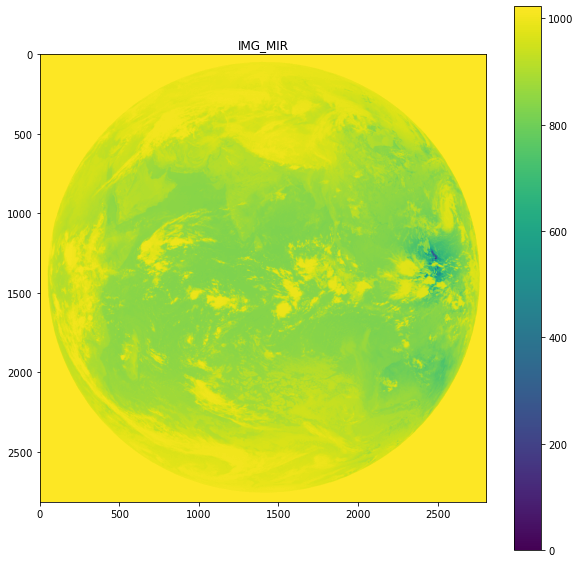

In [4]:
vis = f['IMG_MIR'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im1 = plt.imshow(vis)
plt.colorbar(im1)
plt.title('IMG_MIR')

Text(0.5, 1.0, 'IMG_SWIR')

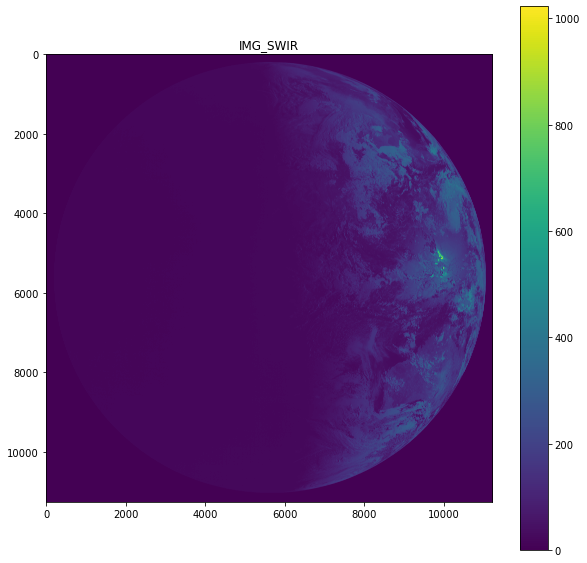

In [5]:
vis = f['IMG_SWIR'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im2 = plt.imshow(vis)
plt.colorbar(im2)
plt.title('IMG_SWIR')

Text(0.5, 1.0, 'IMG_TIR_1')

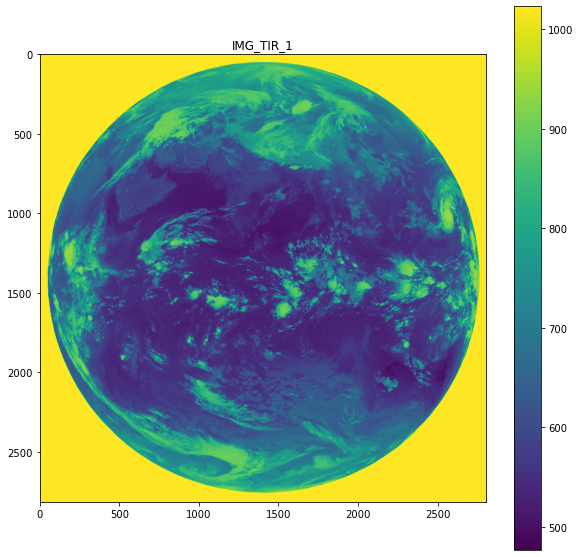

In [6]:
vis = f['IMG_TIR1'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im3 = plt.imshow(vis)
plt.colorbar(im3)
plt.title('IMG_TIR_1')

Text(0.5, 1.0, 'IMG_TIR_2')

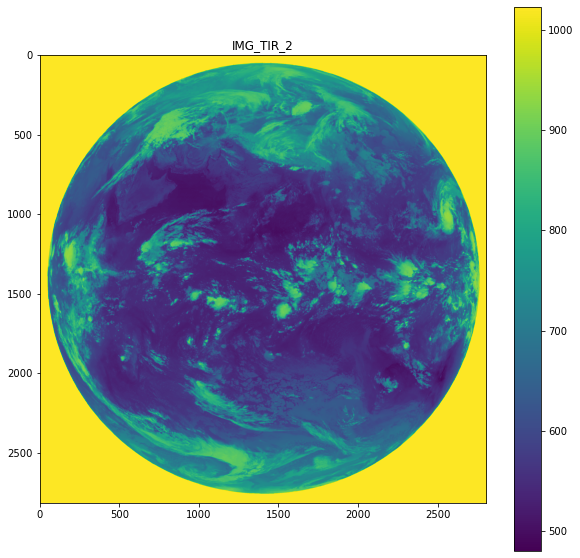

In [7]:
vis = f['IMG_TIR2'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im4 = plt.imshow(vis)
plt.colorbar(im4)
plt.title('IMG_TIR_2')

Text(0.5, 1.0, 'IMG_VIS')

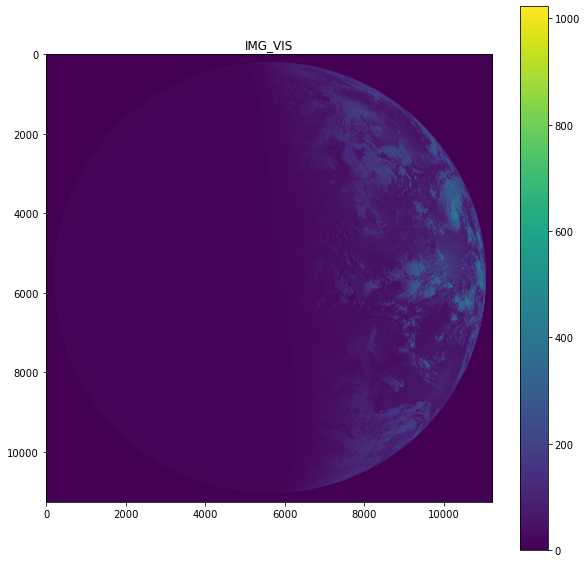

In [8]:
vis = f['IMG_VIS'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im5 = plt.imshow(vis)
plt.colorbar(im5)
plt.title('IMG_VIS')

Text(0.5, 1.0, 'IMG_WV')

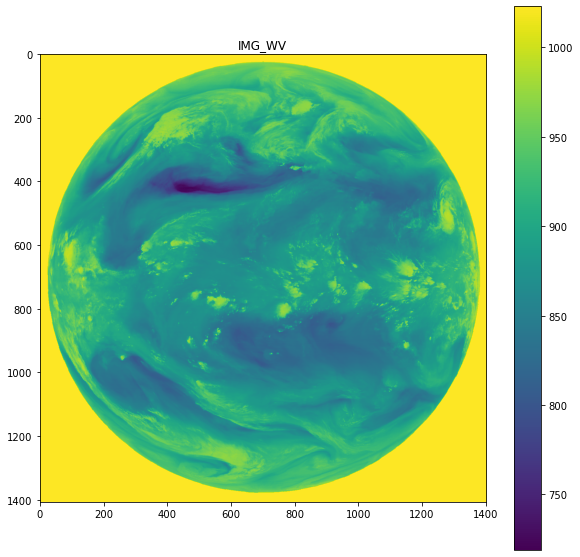

In [9]:
vis = f['IMG_WV'][0,:,:]
fig,ax = plt.subplots(figsize=(10,10))
im6 = plt.imshow(vis)
plt.colorbar(im6)
plt.title('IMG_WV')

# INDIAN REGION

#### Part 2 

#### IMG_TIR1

In [10]:
#Importing libraries

import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# Reading file

fn = '3DIMG_30MAR2018_0000_L1B_STD.h5' #filename (the ".h5" file)
with h5py.File(fn) as f:  
    img_arr = f['IMG_TIR1'][0,:,:] 

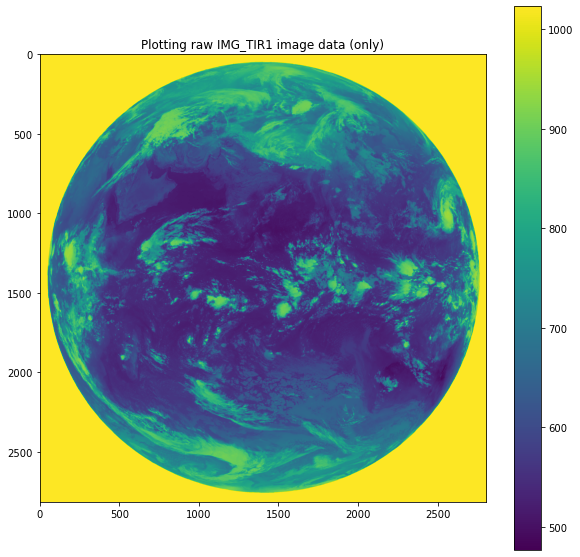

In [12]:
# Plotting raw data
fig = plt.subplots(figsize=(10,10)) 
plt.title('Plotting raw IMG_TIR1 image data (only)')
im = plt.imshow(img_arr) 
plt.colorbar(im)

Text(0.5, 1.0, 'Plotting raw IMG_TIR1 data + Geostationary coastlines')

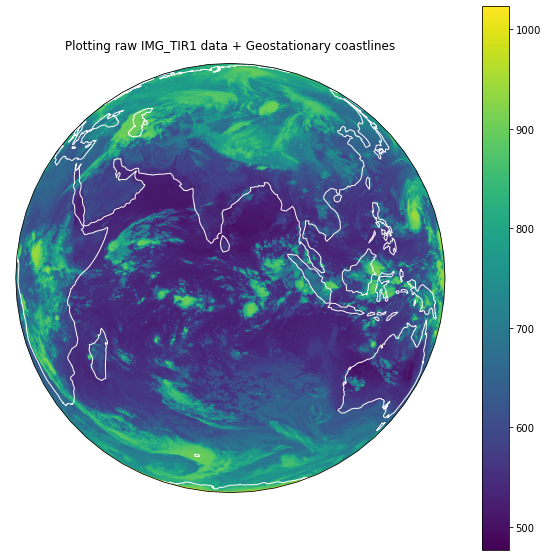

In [14]:
# Adding coastlines to the raw IMG_TIR1 image data.

map_proj = ccrs.Geostationary(central_longitude=82.0)  

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=map_proj)
ax.coastlines(color='white')

#image extent in Geostationary coordinates:

img_extent_sat = ax.get_extent(crs=map_proj)    
img_extent_sat = [1.04*x for x in img_extent_sat]

im = plt.imshow(img_arr, extent=img_extent_sat) 
plt.colorbar(im)
plt.title('Plotting raw IMG_TIR1 data + Geostationary coastlines')

### Reading the file and getting data from it 

In [31]:
fn = '3DIMG_30MAR2018_0000_L1B_STD.h5' #filename (the ".h5" file) 
with h5py.File(fn) as f:     

# retrieve image data:
    image = 'IMG_TIR1'
    img_arr = f[image][0,:,:] 

# get _FillValue for data masking
    img_arr_fill = f[image].attrs['_FillValue'][0]   

# retrieve extent of plot from file attributes:
    left_lon = f.attrs['left_longitude'][0]
    right_lon = f.attrs['right_longitude'][0]
    lower_lat = f.attrs['lower_latitude'][0]
    upper_lat = f.attrs['upper_latitude'][0]
    sat_long = f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1]
    sat_hght = f.attrs['Observed_Altitude(km)'][0] * 1000.0 # (for meters)

# retrieve attributes to calculate radiance from count:    
    Sensor_Name = f.attrs['Sensor_Name'].decode('utf-8') 
    img_fill = f[image].attrs['_FillValue'][0]   
    img_inv  = f[image].attrs['invert'].decode('utf-8')
    img_lrquad = f[image].attrs['lab_radiance_quad'][0]
    img_lrscale = f[image].attrs['lab_radiance_scale_factor'][0]
    img_lroff = f[image].attrs['lab_radiance_add_offset'][0]
    print('Done reading HDF5 file')  
    
    ## Use np.ma.masked_equal with integer values to  
## mask '_FillValue' data in corners:
img_arr_m = np.ma.masked_equal(img_arr, img_arr_fill, copy=True)

Done reading HDF5 file


In [34]:
img_arr

array([[1023, 1023, 1023, ..., 1023, 1023, 1023],
       [1023, 1023, 1023, ..., 1023, 1023, 1023],
       [1023, 1023, 1023, ..., 1023, 1023, 1023],
       ...,
       [1023, 1023, 1023, ..., 1023, 1023, 1023],
       [1023, 1023, 1023, ..., 1023, 1023, 1023],
       [1023, 1023, 1023, ..., 1023, 1023, 1023]], dtype=uint16)

In [36]:
img_arr.shape

(2816, 2805)

Start on Plot1
plotting data for Plot1 image
done with Plot1


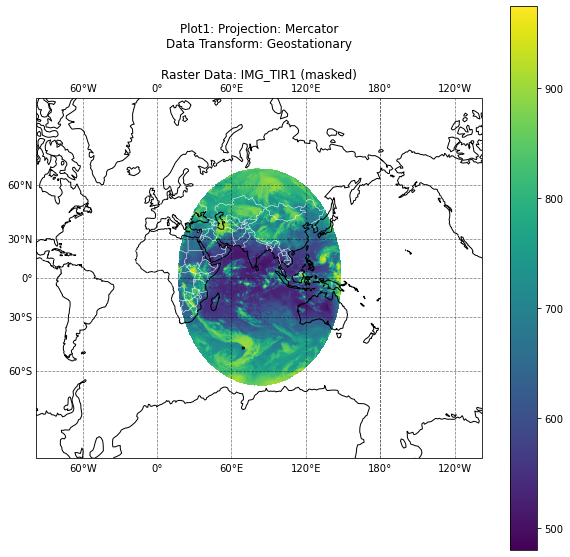

In [16]:
# Plot 1 uses Mercator projection
print('Start on Plot1')

map_proj = ccrs.Mercator(central_longitude=sat_long,
                      min_latitude=lower_lat, max_latitude=upper_lat)
data_crs = ccrs.Geostationary(central_longitude=sat_long,
                              satellite_height=sat_hght)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=map_proj)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.5)
ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)

map_proj_text = f'{str(type(map_proj)).split(".")[-1][:-2]}'
data_crs_text = f'{str(type(data_crs)).split(".")[-1][:-2]}'
plt.title(f'Plot1: Projection: {map_proj_text}\n' + \
          f'Data Transform: {data_crs_text}\n' + \
          f'\nRaster Data: {image} (masked)')
print('plotting data for Plot1 image')
im1 = ax1.imshow(img_arr_m, origin='upper', transform=data_crs)
plt.colorbar(im1)

print('done with Plot1')
# If you plot img_arr instead of img_arr_m, you will see the yellow '_FillValue' "halo" around the image

In [17]:
#Mercator coordinates are not in degrees, so I created a function to transform the extent values

def transform_extent_pts(extent_pts, map_proj, pt_crs):
    
    xul, yul = map_proj.transform_point(
        x = extent_pts[0],
        y = extent_pts[3],
        src_crs = pt_crs)
    
    xlr, ylr = map_proj.transform_point(
        x = extent_pts[1],
        y = extent_pts[2],
        src_crs = pt_crs)

    return [xul, xlr, ylr, yul]

Start on Plot2
plotting data for Plot2 image
done with Plot2


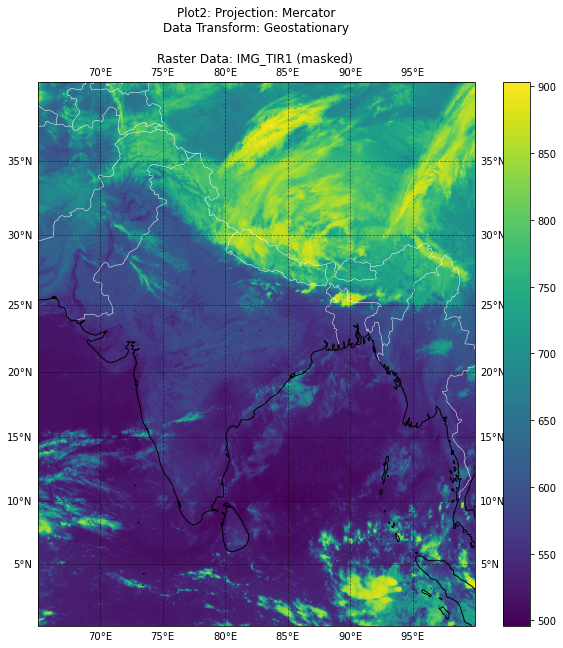

In [18]:
# Plot 2 on Mercator projection
print('Start on Plot2')

map_proj = ccrs.Mercator(central_longitude=sat_long,
                      min_latitude=lower_lat, max_latitude=upper_lat)
data_crs = ccrs.Geostationary(central_longitude=sat_long,
                              satellite_height=sat_hght)

plt.figure(figsize=(10,10))
ax2 = plt.axes(projection=map_proj)
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.5)
ax2.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)

# Focus map on Indian subcontinent:
deg_crs = ccrs.PlateCarree()
map_extent_deg = (65., 100., 0., 40.) # lon/lat focused on image
#map_extent_deg = (60.0, 97.0, -10.0, 37.5) # India
map_extent_merc = transform_extent_pts(map_extent_deg, map_proj, deg_crs)

ax2.set_extent(map_extent_merc, map_proj)

map_proj_text = f'{str(type(map_proj)).split(".")[-1][:-2]}'
data_crs_text = f'{str(type(data_crs)).split(".")[-1][:-2]}'
plt.title(f'Plot2: Projection: {map_proj_text}\n' + \
          f'Data Transform: {data_crs_text}\n' + \
          f"\nRaster Data: {image} (masked) ")
print('plotting data for Plot2 image')
im2 = plt.imshow(img_arr_m, origin='upper', transform=data_crs)
plt.colorbar(im2)

print('done with Plot2')

### IMG_VIS

In [19]:
fn = '3DIMG_30MAR2018_0000_L1B_STD.h5' #filename (the ".h5" file) 
with h5py.File(fn) as f:     

# retrieve image data:
    image = 'IMG_VIS'
    img_arr = f[image][0,:,:] 

# get _FillValue for data masking
    img_arr_fill = f[image].attrs['_FillValue'][0]   

# retrieve extent of plot from file attributes:
    left_lon = f.attrs['left_longitude'][0]
    right_lon = f.attrs['right_longitude'][0]
    lower_lat = f.attrs['lower_latitude'][0]
    upper_lat = f.attrs['upper_latitude'][0]
    sat_long = f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1]
    sat_hght = f.attrs['Observed_Altitude(km)'][0] * 1000.0 # (for meters)

# retrieve attributes to calculate radiance from count:    
    Sensor_Name = f.attrs['Sensor_Name'].decode('utf-8') 
    img_fill = f[image].attrs['_FillValue'][0]   
    img_inv  = f[image].attrs['invert'].decode('utf-8')
    img_lrquad = f[image].attrs['lab_radiance_quad'][0]
    img_lrscale = f[image].attrs['lab_radiance_scale_factor'][0]
    img_lroff = f[image].attrs['lab_radiance_add_offset'][0]
    print('Done reading HDF5 file')  
    
    ## Use np.ma.masked_equal with integer values to  
## mask '_FillValue' data in corners:
img_arr_m = np.ma.masked_equal(img_arr, img_arr_fill, copy=True)

Done reading HDF5 file


In [20]:
#Mercator coordinates are not in degrees, so I created a function to transform the extent values

def transform_extent_pts(extent_pts, map_proj, pt_crs):
    
    xul, yul = map_proj.transform_point(
        x = extent_pts[0],
        y = extent_pts[3],
        src_crs = pt_crs)
    
    xlr, ylr = map_proj.transform_point(
        x = extent_pts[1],
        y = extent_pts[2],
        src_crs = pt_crs)

    return [xul, xlr, ylr, yul]

Start on Plot2
plotting data for Plot2 image
done with Plot2


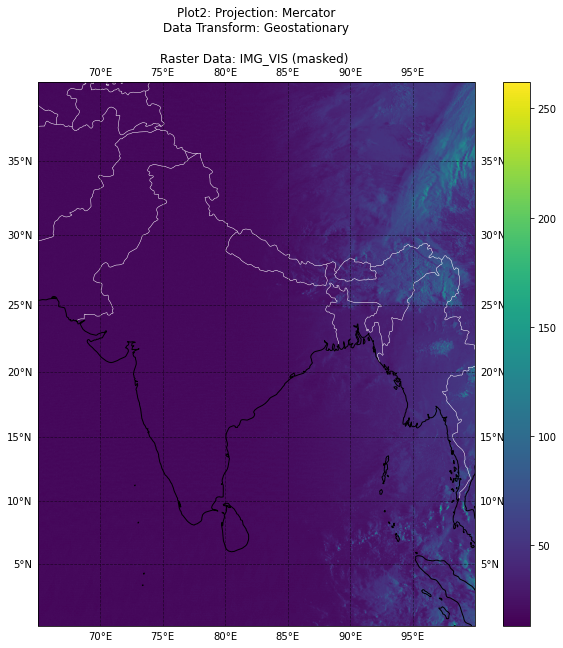

In [21]:
# Plot 2 on Mercator projection
print('Start on Plot2')

map_proj = ccrs.Mercator(central_longitude=sat_long,
                      min_latitude=lower_lat, max_latitude=upper_lat)
data_crs = ccrs.Geostationary(central_longitude=sat_long,
                              satellite_height=sat_hght)

plt.figure(figsize=(10,10))
ax2 = plt.axes(projection=map_proj)
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.5)
ax2.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)

# Focus map on Indian subcontinent:
deg_crs = ccrs.PlateCarree()
map_extent_deg = (65., 100., 0., 40.) # lon/lat focused on image
#map_extent_deg = (60.0, 97.0, -10.0, 37.5) # India
map_extent_merc = transform_extent_pts(map_extent_deg, map_proj, deg_crs)

ax2.set_extent(map_extent_merc, map_proj)

map_proj_text = f'{str(type(map_proj)).split(".")[-1][:-2]}'
data_crs_text = f'{str(type(data_crs)).split(".")[-1][:-2]}'
plt.title(f'Plot2: Projection: {map_proj_text}\n' + \
          f'Data Transform: {data_crs_text}\n' + \
          f"\nRaster Data: {image} (masked) ")
print('plotting data for Plot2 image')
im2 = plt.imshow(img_arr_m, origin='upper', transform=data_crs)
plt.colorbar(im2)

print('done with Plot2')

### Cloud Thresholds

Calculate cloud mask for DATA
plot image for Plot4


C:\Users\offic\AppData\Local\Temp/ipykernel_14256/371362471.py:9: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im4)


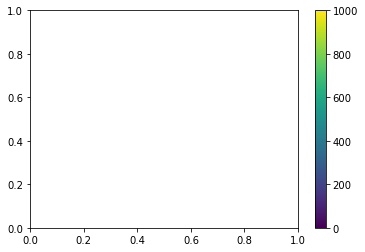

In [28]:
# Plot cloud thresholds on Mercator projection
print('Calculate cloud mask for DATA')

# Left Plot: set values <=700 to 0
cloud1 = np.where(img_arr_m <= 700, 0, img_arr_m)

print('plot image for Plot4')
# to create plot on left:
im4 = ax2.imshow(cloud1, vmin=0, vmax=1000, origin='upper', transform=data_crs)
plt.colorbar(im4)

C:\Users\offic\AppData\Local\Temp/ipykernel_14256/778514219.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im4)


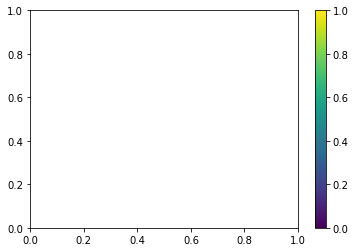

In [25]:
# Right Plot: set values <=700 to 0, >700 to 1
cloud2 = np.where(img_arr_m <= 700, 0, 1)
# to create plot on right:
im4 = ax2.imshow(cloud2, vmin=0, vmax=1, origin='upper', transform=data_crs)
plt.colorbar(im4)

In [30]:
print('img_arr_m')

img_arr_m
